Name:- Sourabh Solanki
    
Batch:- DS2403

# <span style ="color:Red">Project Description</span> 


Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
    
This problem statement contains two datasets- Zomato.csv and country_code.csv.

Country_code.csv contains two variables:
    
• Country code
• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
    
• Restaurant Name: Name of the restaurant
    
• Country Code: Country in which restaurant is located
    
• City: City in which restaurant is located
    
• Address: Address of the restaurant
    
• Locality: Location in the city
    
• Locality Verbose: Detailed description of the locality
    
• Longitude: Longitude coordinate of the restaurant&#39;s location
    
• Latitude: Latitude coordinate of the restaurant&#39;s location
    
• Cuisines: Cuisines offered by the restaurant
    
• Average Cost for two: Cost for two people in different currencies ��
    
• Currency: Currency of the country
    
• Has Table booking: yes/no
    
• Has Online delivery: yes/ no
    
• Is delivering: yes/ no
    
• Switch to order menu: yes/no
    
• Price range: range of price of food
    
• Aggregate Rating: Average rating out of 5
    
• Rating color: depending upon the average rating color
    
• Rating text: text on the basis of rating of rating
    
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
    
1) Average Cost for two

2) Price range


Hint : Use pandas methods to combine all the datasets and then start working on this project.


# <span style = "color:Gradient">Importing Libraries</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression, Ridge,Lasso, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import zscore

# Load Data Set

In [2]:
df = pd.read_csv('zomato.csv', encoding='latin1')

In [3]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
cn = pd.read_excel('Country-Code.xlsx')

In [5]:
cn

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [6]:
df = pd.merge(df,cn, on='Country Code')

In [7]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [8]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [12]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In cuisines having null values


In [13]:
df.isna()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



# Stastical Summary

In [14]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [15]:
cat_col=[]
for col in df.columns:
    if df[col].dtypes=='object':
        cat_col.append(col)
print('Categorical Column :',cat_col)

Categorical Column : ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']


In [16]:
num_col=[]
for col in df.columns:
    if df[col].dtypes!='object':
        num_col.append(col)
print('Numerical Column :',num_col)

Numerical Column : ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


# Exploratory Data Analysis 

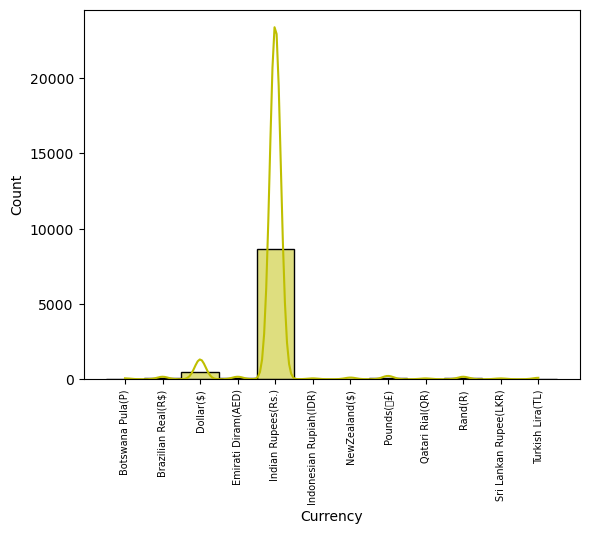

In [17]:
sns.histplot(df['Currency'],kde=True,color='y')
plt.xticks(fontsize=7, rotation=90)
plt.show()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


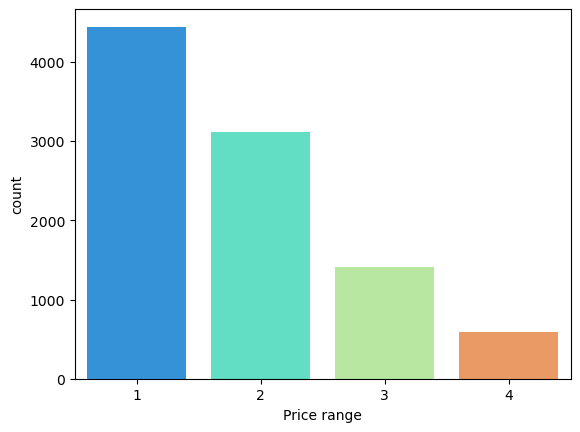

In [18]:
sns.countplot(x='Price range',palette='rainbow',data=df)
print(df['Price range'].value_counts())

<Axes: xlabel='Aggregate rating', ylabel='count'>

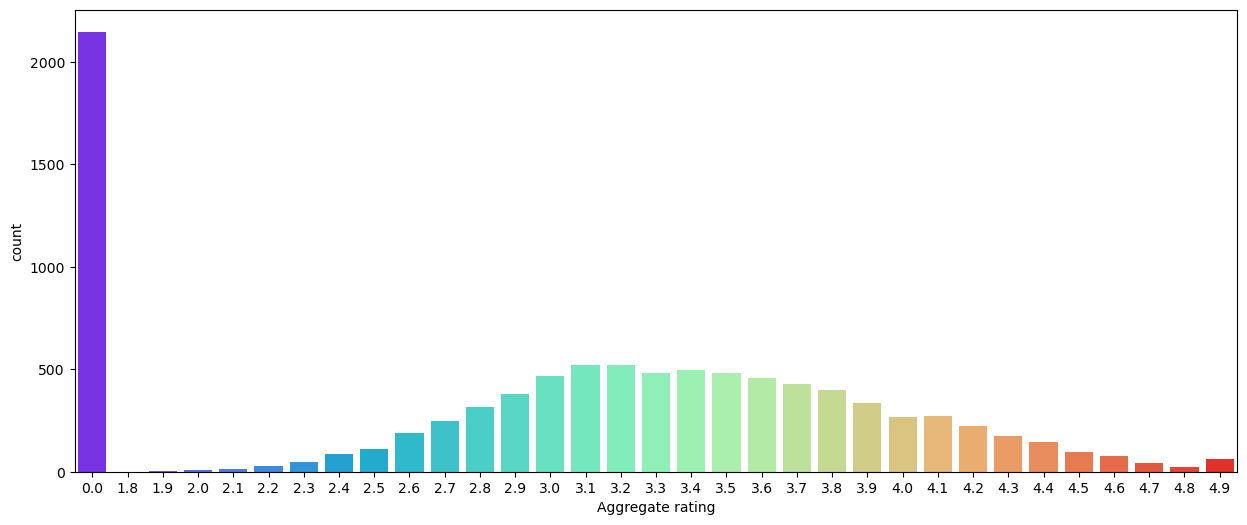

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x='Aggregate rating', palette='rainbow',data=df)


# Encoding

In [20]:
le = LabelEncoder()
for i in df.columns:
    df[i]= le.fit_transform(df[i])

In [21]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,4824,3749,6,73,8685,171,172,8042,384,920,...,1,0,0,0,2,31,0,1,314,6
1,4814,3173,6,73,6055,593,601,8041,382,1111,...,1,0,0,0,2,28,0,1,545,6
2,4810,2897,6,75,4684,308,314,8053,388,1671,...,1,0,0,0,3,27,1,5,270,6
3,4827,4707,6,75,8690,862,875,8050,391,1126,...,0,0,0,0,3,32,0,1,362,6
4,4820,5523,6,75,8689,862,875,8055,390,1122,...,1,0,0,0,3,31,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4751,4443,11,140,5926,517,523,634,8419,1813,...,0,0,0,0,2,24,1,5,663,11
9547,4748,1311,11,140,5962,552,558,643,8418,1824,...,0,0,0,0,2,25,1,5,755,11
9548,4752,3069,11,140,5966,554,561,641,8425,1110,...,0,0,0,0,3,20,5,2,585,11
9549,4754,513,11,140,5967,554,561,642,8426,1657,...,0,0,0,0,3,23,1,5,714,11


# Checking Skewness

In [22]:
df.skew()

Restaurant ID            0.000000
Restaurant Name          0.044637
Country Code             3.225168
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude                0.050762
Latitude                 0.043785
Cuisines                -0.305484
Average Cost for two     0.089636
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.296072
Rating color             0.046009
Rating text              0.431408
Votes                    2.445367
Country                  3.312721
dtype: float64

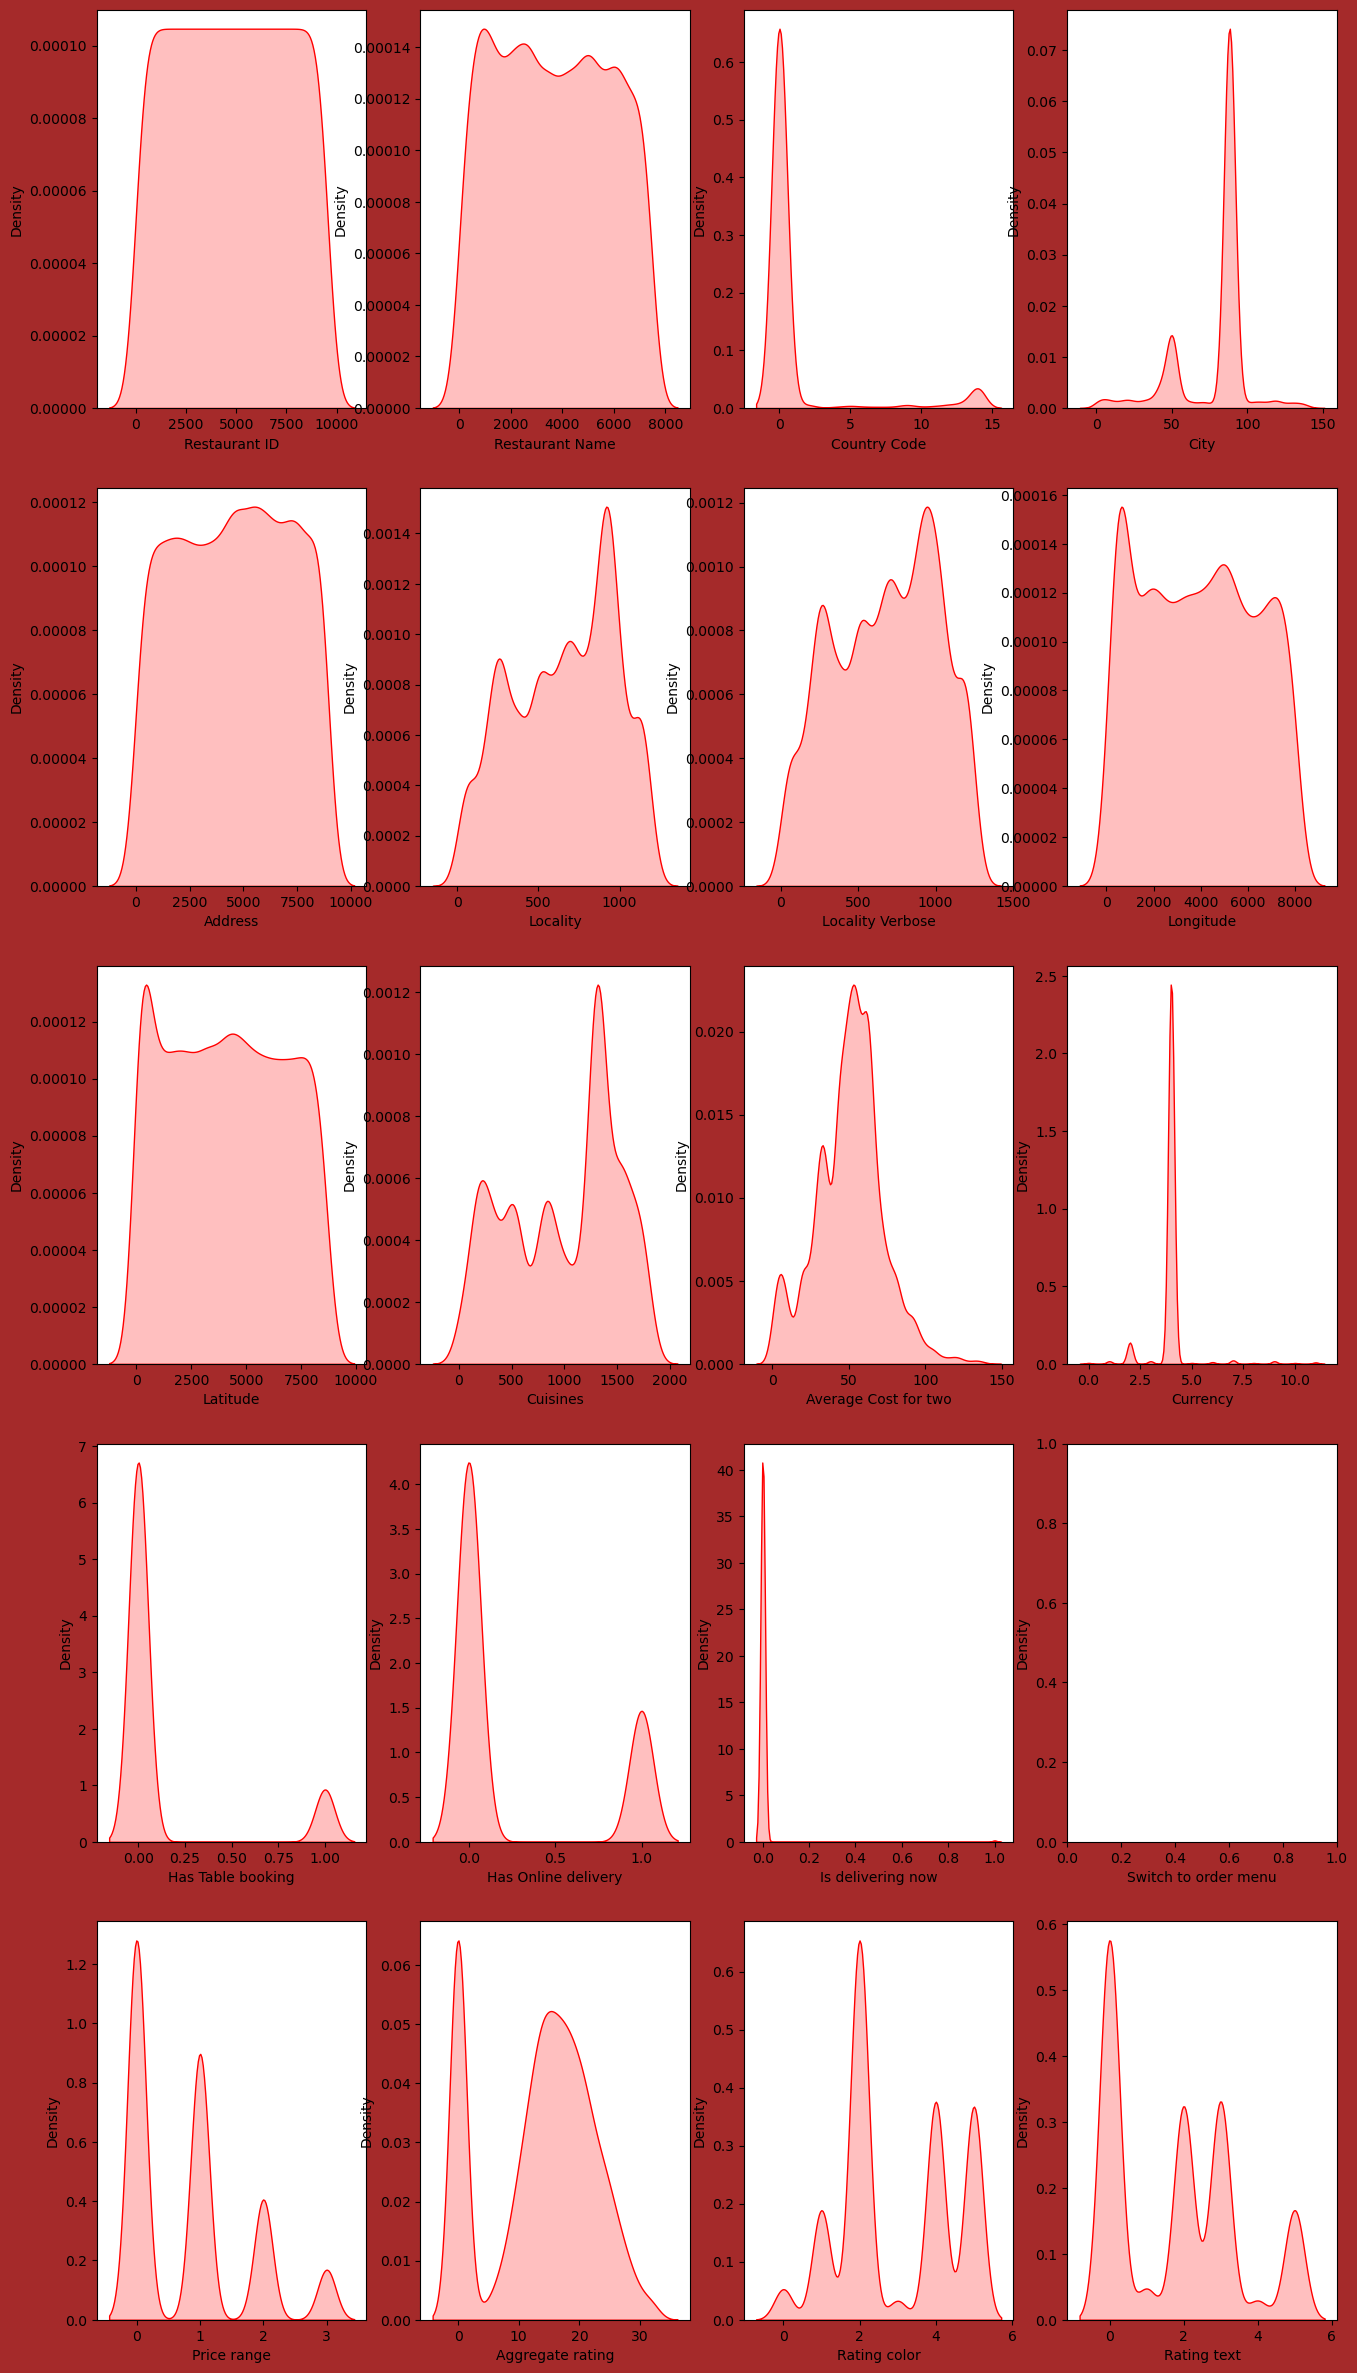

In [23]:
plt.figure(figsize=(16,30), facecolor='brown')
plotnumber=1
for column in df:
    if plotnumber <=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [24]:
# columns with right-skewed data containing zeros
right_skewed_columns =  [ 'Country Code', 'Cuisines','Average Cost for two', 'Currency', 'Has Table booking',
                         'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Votes']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[right_skewed_columns] = scaler.fit_transform(df[right_skewed_columns].values)

In [25]:
from scipy.stats import boxcox
# Columns with left-skewed data containing zeros
left_skewed_columns = ['City', 'Longitude', 'Latitude', 'Aggregate rating']

# Add a small constant to ensure all data points are positive
df[left_skewed_columns] += abs(df[left_skewed_columns].min()) + 1

# Apply Box-Cox transformation
df[left_skewed_columns] = df[left_skewed_columns].apply(lambda x: boxcox(x)[0])

# Checking Outliers

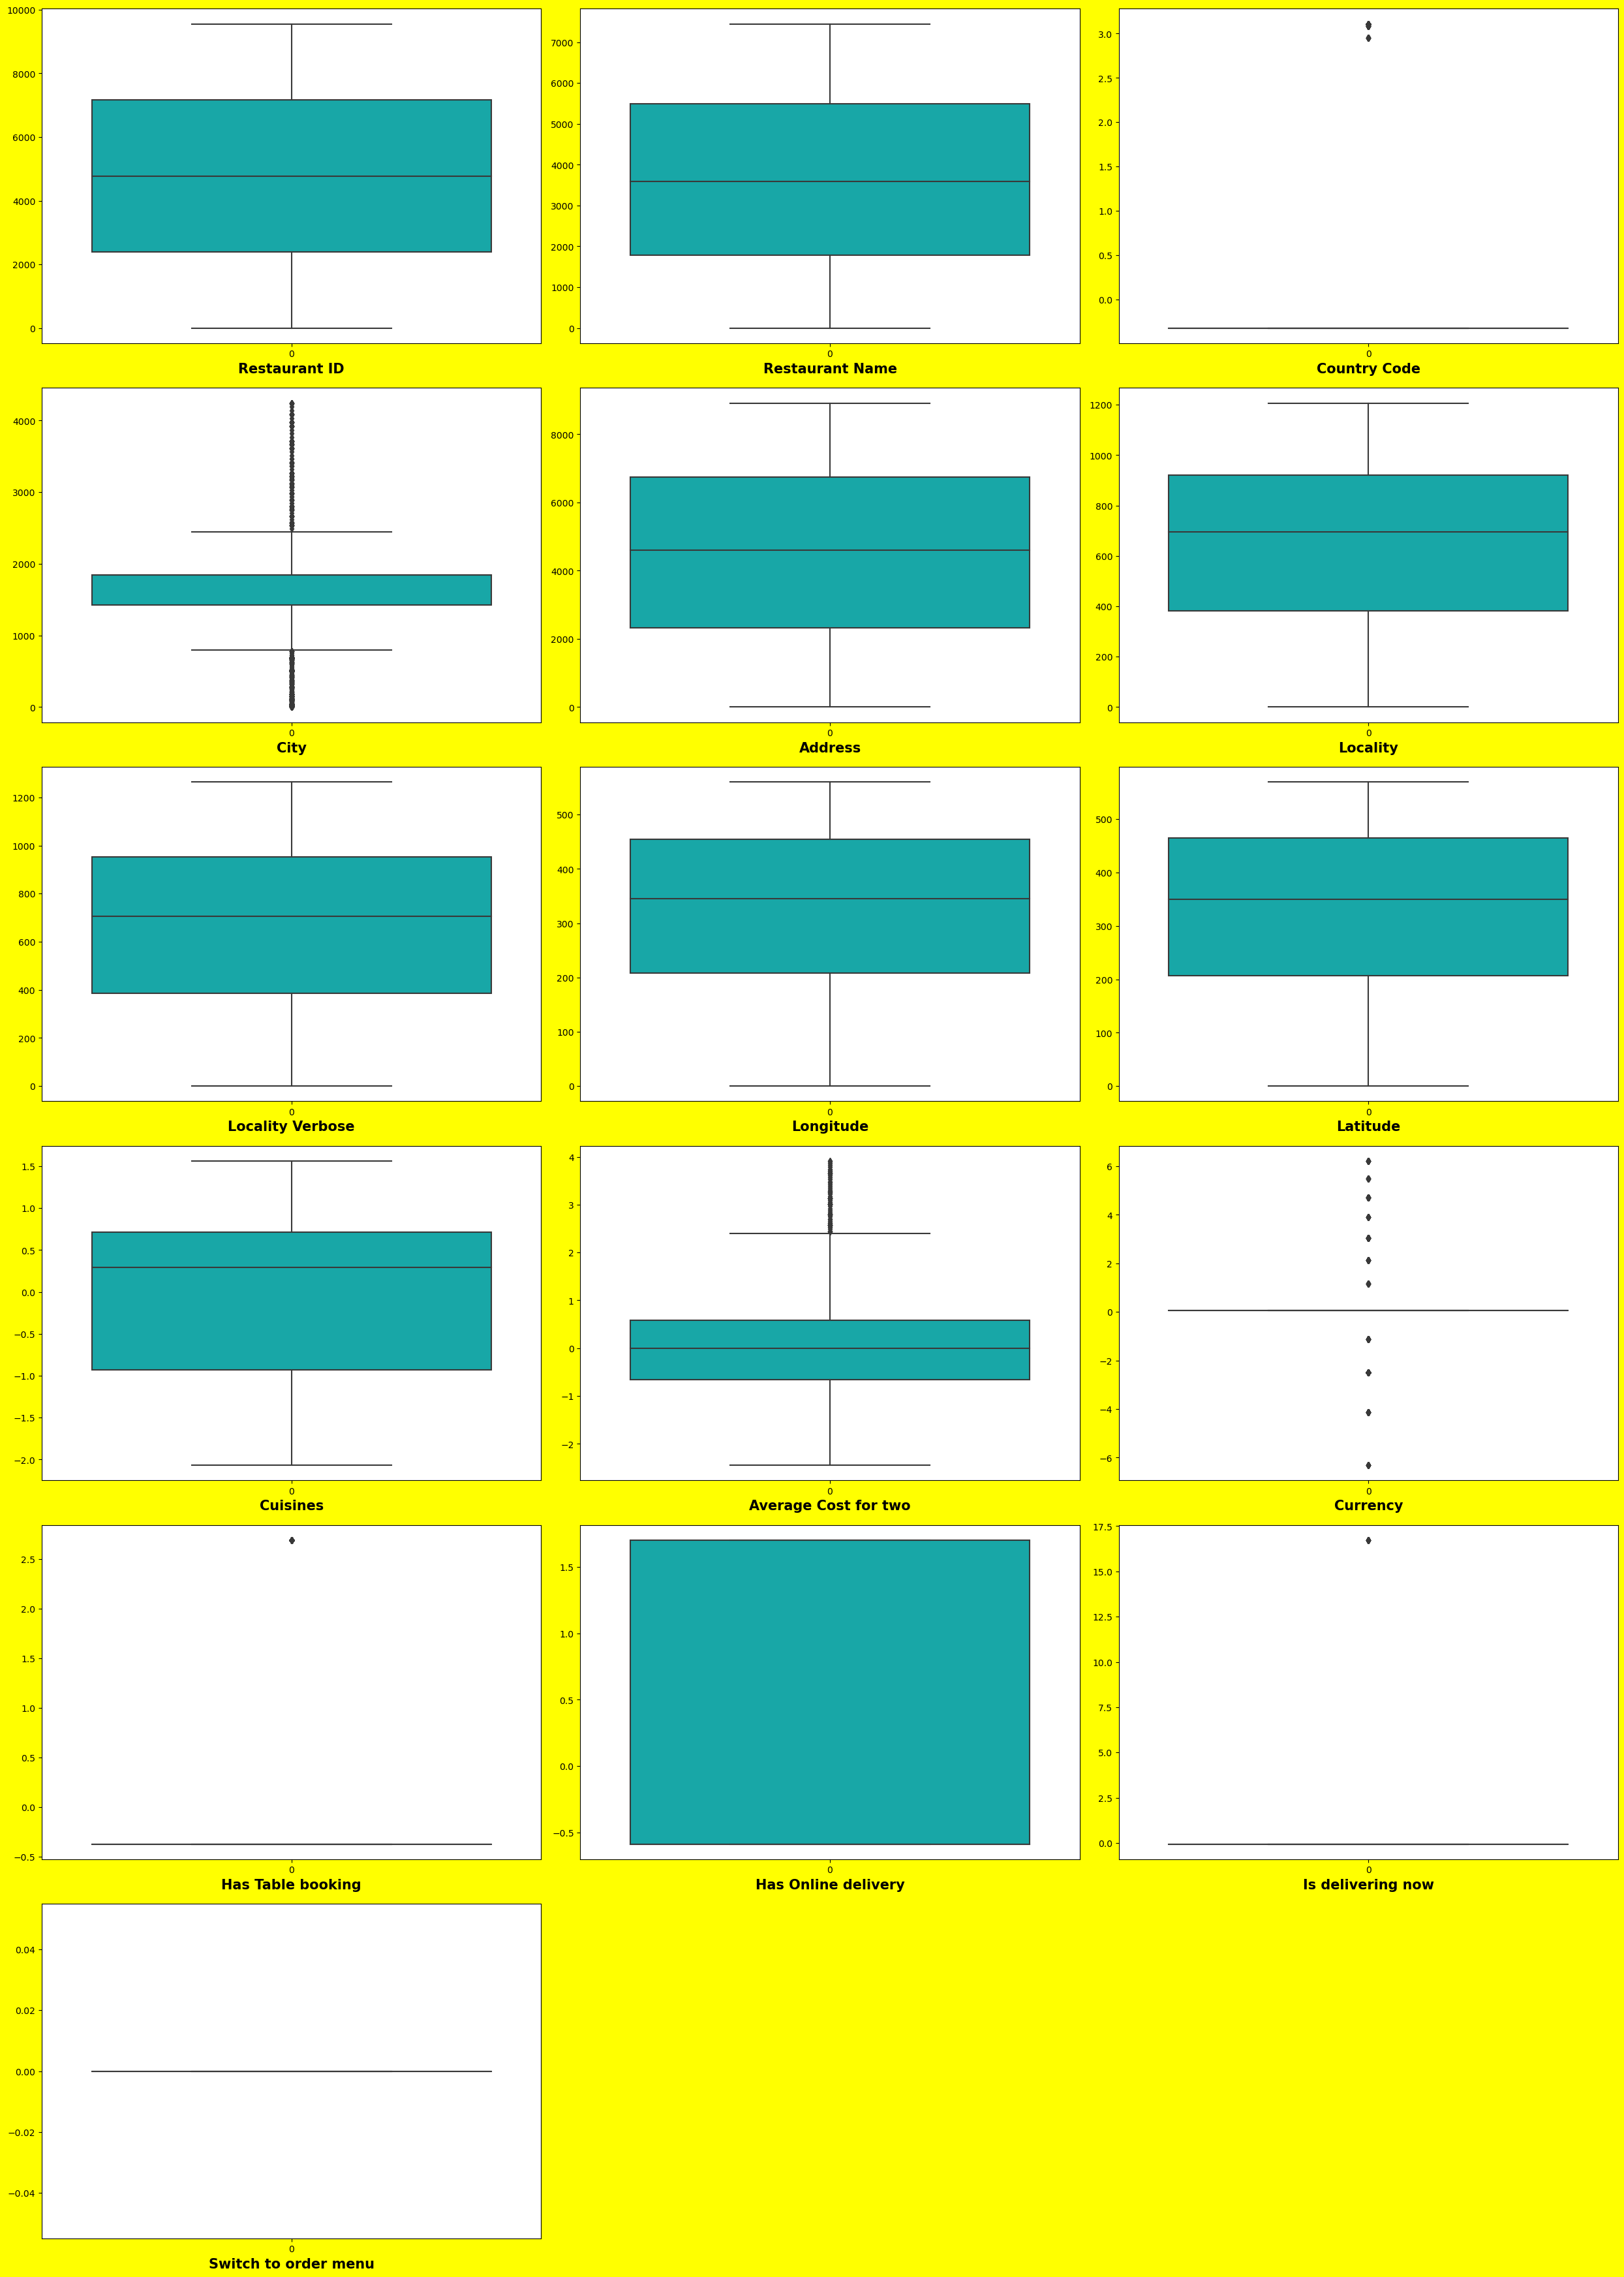

In [26]:
plt.figure(figsize=(25,35),facecolor='yellow')
pltnum=1
for i in df.columns:
    if pltnum<=16:
        ax= plt.subplot(6,3,pltnum)
        sns.boxplot(df[i], color='c')
        plt.xlabel(i,fontsize=15,fontweight='bold')
        pltnum+=1
plt.tight_layout()
plt.show()

In [27]:
# Specify the columns to remove outliers
columns_to_remove_outliers = [ 'Country Code', 'City','Longitude', 'Latitude', 'Currency', 'Has Table booking',
    'Has Online delivery', 'Is delivering now','Votes']

# Calculate z-scores for each specified column
z_scores = df[columns_to_remove_outliers].apply(zscore)

# Set a threshold for z-scores 
threshold = 3

# Remove rows with z-scores beyond the threshold in any specified column
df1 = df[(z_scores.abs() < threshold).all(axis=1)]

In [28]:
df.drop(columns=['Switch to order menu'], inplace=True)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,4824,3749,3.107687,1323.365811,8685,171,172,556.619306,73.169083,-0.099847,...,-6.310872,2.692181,-0.587547,-0.059771,2,18.581387,-2.210060,-0.224511,1.260344,6
1,4814,3173,3.107687,1323.365811,6055,593,601,556.573746,72.915469,0.261469,...,-6.310872,2.692181,-0.587547,-0.059771,2,17.085766,-2.210060,-0.224511,1.570239,6
2,4810,2897,3.107687,1388.752476,4684,308,314,557.120340,73.674946,1.286561,...,-6.310872,2.692181,-0.587547,-0.059771,3,16.580335,-1.345107,1.503228,1.176759,6
3,4827,4707,3.107687,1388.752476,8690,862,875,556.983718,74.053159,0.289549,...,-6.310872,-0.371446,-0.587547,-0.059771,3,19.073475,-2.210060,-0.224511,1.339600,6
4,4820,5523,3.107687,1388.752476,8689,862,875,557.211412,73.927200,0.282065,...,-6.310872,2.692181,-0.587547,-0.059771,3,18.581387,-2.210060,-0.224511,1.086197,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4751,4443,3.108229,4245.552257,5926,517,523,103.875293,558.482405,1.540143,...,6.216800,-0.371446,-0.587547,-0.059771,2,15.041218,-1.345107,1.503228,1.682129,11
9547,4748,1311,3.108229,4245.552257,5962,552,558,104.853658,558.438975,1.559696,...,6.216800,-0.371446,-0.587547,-0.059771,2,15.558233,-1.345107,1.503228,1.756816,11
9548,4752,3069,3.108229,4245.552257,5966,554,561,104.636652,558.742944,0.259596,...,6.216800,-0.371446,-0.587547,-0.059771,3,12.928610,1.323624,0.376860,1.610568,11
9549,4754,513,3.108229,4245.552257,5967,554,561,104.745184,558.786361,1.261439,...,6.216800,-0.371446,-0.587547,-0.059771,3,14.519972,-1.345107,1.503228,1.724675,11


# Correlation

<Axes: >

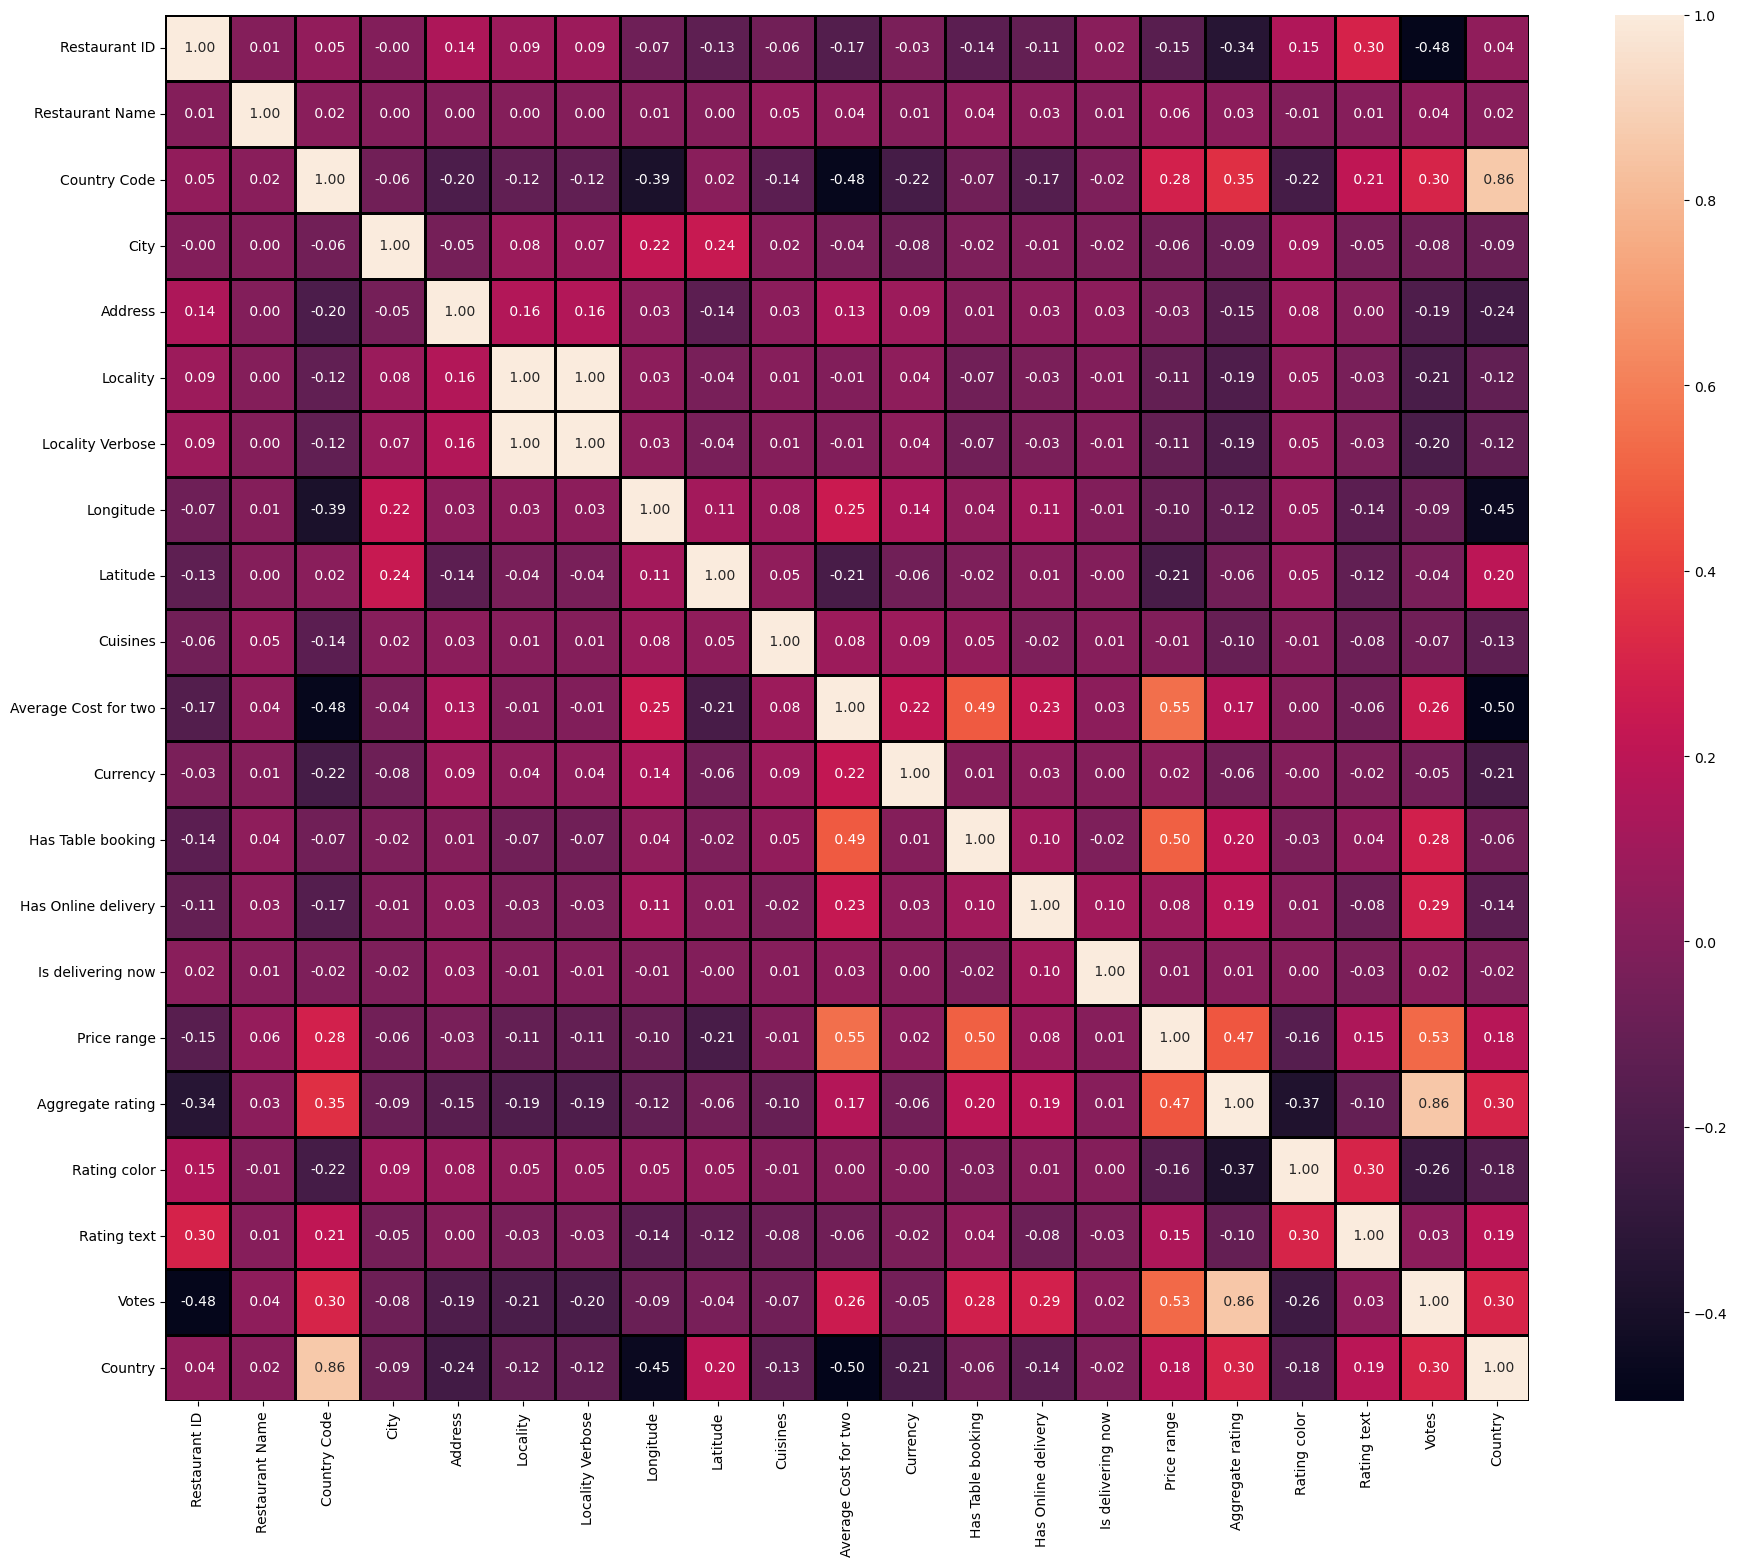

In [29]:
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='black',fmt=' .2f')

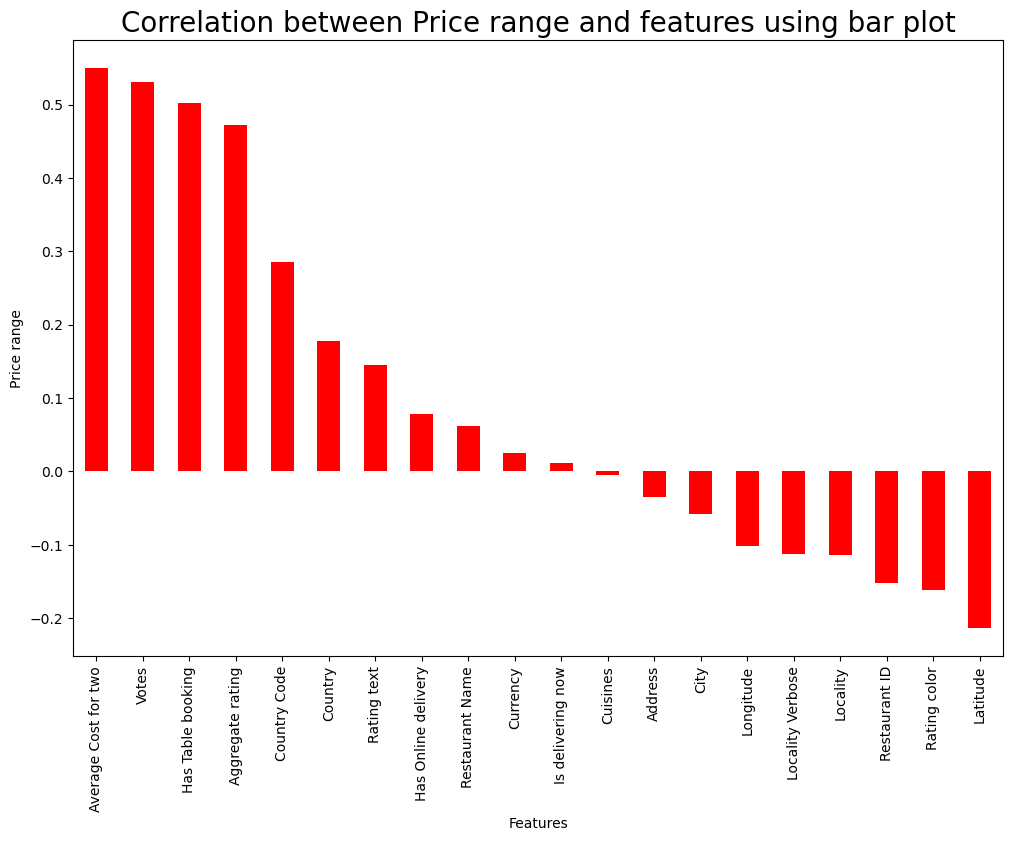

In [30]:
plt.figure(figsize=(12,8))
df.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar', color='Red')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Price range', fontsize=10)
plt.title('Correlation between Price range and features using bar plot', fontsize=20)
plt.show()

# ML Model

In [31]:
feature_columns=['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
        'Currency', 'Has Table booking','Has Online delivery', 'Is delivering now', 
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
label_columns=['Average Cost for two']
labelcolumn=['Price range']

In [32]:
X = df[feature_columns]
Y = df[labelcolumn]
y = df[label_columns]

In [33]:

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns

In [35]:
vif

,VIF,Features
0,1.006831,Restaurant Name
1,1.666959,Country Code
2,1.140076,City
3,1.112989,Address
4,957.305019,Locality
5,956.330568,Locality Verbose
6,1.268710,Longitude
7,1.121602,Latitude
8,1.047976,Cuisines
9,1.080715,Currency


# 1) Price Range

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20, random_state=45)


In [37]:
model=[LogisticRegression(), SVC(), GradientBoostingClassifier(), AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), DecisionTreeClassifier()]

# Best Random State

In [38]:

maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .20, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    Y_pred=lr.predict(X_test)
    acc=accuracy_score(Y_test,Y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu*100 ,'on Random_state', maxRS)

Best accuracy is 66.09105180533751 on Random_state 152


# Evalution Metrics

In [39]:
for m in model:
    m.fit(X_train, Y_train)
    pred=m.predict(X_test)
    print('Evaluation Metrics of ',m,':\n')
    print('Accuracy Score:\n', accuracy_score(Y_test,pred))
    print('\n')
    print('Confusion matrix :\n',confusion_matrix(Y_test,pred))
    print('\n')
    print('Classification Report :\n', classification_report(Y_test,pred))

Evaluation Metrics of  LogisticRegression() :

Accuracy Score:
 0.6295133437990581


Confusion matrix :
 [[736 141  20   1]
 [272 295  62   4]
 [ 20  79 140  19]
 [  9  13  68  32]]


Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.82      0.76       898
           1       0.56      0.47      0.51       633
           2       0.48      0.54      0.51       258
           3       0.57      0.26      0.36       122

    accuracy                           0.63      1911
   macro avg       0.58      0.52      0.53      1911
weighted avg       0.62      0.63      0.62      1911

Evaluation Metrics of  SVC() :

Accuracy Score:
 0.6242804814233386


Confusion matrix :
 [[730 154  14   0]
 [284 277  70   2]
 [ 23  71 153  11]
 [  5  12  72  33]]


Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.81      0.75       898
           1       0.54      0.44      0.48       633

# Cross Validation

In [40]:
for m in model:
    score=cross_val_score(m,X,Y,cv=5)
    print('Cross Validation Score of ',m,'is :\n')
    print('Score :',score)
    print('Mean Score :',score.mean())
    print('Standard Deviation :',score.std())
    print('_'*125)

Cross Validation Score of  LogisticRegression() is :

Score : [0.38252224 0.58219895 0.66020942 0.62094241 0.57486911]
Mean Score : 0.564148426990611
Standard Deviation : 0.09579363020011458
_____________________________________________________________________________________________________________________________
Cross Validation Score of  SVC() is :

Score : [0.27577185 0.5078534  0.62513089 0.59057592 0.61099476]
Mean Score : 0.5220653642044817
Standard Deviation : 0.12968200563797805
_____________________________________________________________________________________________________________________________
Cross Validation Score of  GradientBoostingClassifier() is :

Score : [0.27524856 0.42722513 0.57382199 0.64502618 0.64502618]
Mean Score : 0.5132696074805275
Standard Deviation : 0.14313898788551238
_____________________________________________________________________________________________________________________________
Cross Validation Score of  AdaBoostClassifier() is :



# Hyper Para Meter Tuning

In [41]:
param_grid = {
    'n_estimators': [50,100,150],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [42]:
base_estimator = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(base_estimator=base_estimator)

grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5)
grid_search.fit(X,Y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}
Best Score: 0.5814085440861806


In [43]:
best_params= grid_search.best_params_

In [44]:
final_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                 n_estimators=best_params['n_estimators'],
                                 learning_rate=best_params['learning_rate'],
                                 algorithm=best_params['algorithm']
                                )
final_model.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1)

In [45]:
pred= final_model.predict(X_test)
 
accuracy = accuracy_score(Y_test,pred)
print(f"Accuracy: {accuracy:.2f}")
print("\n")
print("Classification Report:")
print(classification_report(Y_test,pred))
print("\n")
print("Confusion Matrix:")
print(confusion_matrix(Y_test,pred))

Accuracy: 0.59


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       898
           1       0.46      0.50      0.48       633
           2       0.56      0.31      0.40       258
           3       0.00      0.00      0.00       122

    accuracy                           0.59      1911
   macro avg       0.42      0.40      0.40      1911
weighted avg       0.54      0.59      0.56      1911



Confusion Matrix:
[[728 170   0   0]
 [297 314  22   0]
 [ 37 141  80   0]
 [ 24  58  40   0]]


Text(0.5, 1.0, 'Confusion MAtrix Heatmap')

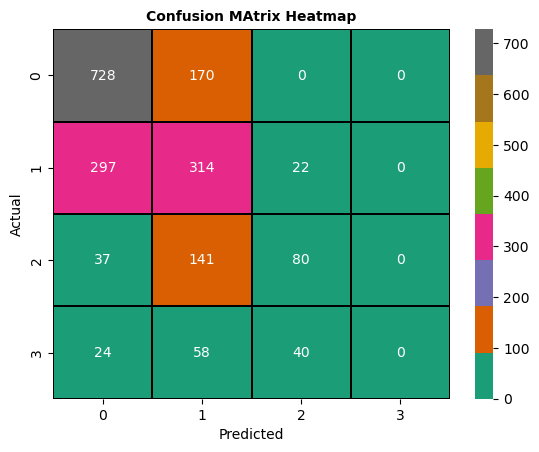

In [46]:
sns.heatmap(confusion_matrix(Y_test,pred),annot=True,cmap='Dark2',fmt='d',linecolor='black',linewidth=.1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion MAtrix Heatmap', fontweight='bold', fontsize=10)

# Saving Model

In [47]:
import joblib

In [48]:
joblib.dump(final_model,'Zomato Restaurant.obj')

['Zomato Restaurant.obj']

# 2) Average Cost For Two

In [49]:
print(X.shape,Y.shape)

(9551, 17) (9551, 1)


# scaling

In [50]:
st=StandardScaler()

In [51]:
Xscale=st.fit_transform(X)
X=pd.DataFrame(Xscale,columns=X.columns)

# Varience Inflaction Factor

In [52]:
VIF=[]
VIF=pd.DataFrame()
VIF['Features List']=X.columns
VIF['VIF value']=[variance_inflation_factor(X.values,i) for i in range (len(X.columns))]
VIF

,Features List,VIF value
0,Restaurant Name,1.006831
1,Country Code,1.666959
2,City,1.140076
3,Address,1.112989
4,Locality,957.305019
5,Locality Verbose,956.330568
6,Longitude,1.268710
7,Latitude,1.121602
8,Cuisines,1.047976
9,Currency,1.080715


In [53]:
#importing libraries
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [54]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=45)

In [55]:
model=[LinearRegression(),Lasso(),Ridge(),SVR(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),ExtraTreesRegressor(),DecisionTreeRegressor()]

# Random State

In [56]:
maxScore=0
maxRS=0

for i in range (0,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.02,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    lr.score(x_train,y_train)
    score=r2_score(y_test,pred)
    if score>maxScore:
        maxScore=score
        maxRs=i
        
print('Maximum Acuracy score is :',maxScore,'On Random State :',maxRS)
    

Maximum Acuracy score is : 0.62255794425163 On Random State : 0


In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=0)

In [58]:
print(x_train.shape,x_train.shape)

(7640, 17) (7640, 17)


In [59]:
print(x_test.shape,y_test.shape)

(1911, 17) (1911, 1)


# Evaluation Metrix 

In [60]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Evaluation metrics of',m,':')
    print(f" R2 score is: {r2_score(y_test,pred)*100}")
    print ('\n','mean_absolute_error:','\n',mean_absolute_error(y_test,pred))
    print ('\n','mean_squared_error:','\n',mean_squared_error(y_test,pred))
    print('_'*125)

Evaluation metrics of LinearRegression() :
 R2 score is: 51.874468858643155

 mean_absolute_error: 
 0.49856186204127967

 mean_squared_error: 
 0.40082951009153356
_____________________________________________________________________________________________________________________________
Evaluation metrics of Lasso() :
 R2 score is: -0.004202561182831133

 mean_absolute_error: 
 0.7541306736145927

 mean_squared_error: 
 0.8329182986459868
_____________________________________________________________________________________________________________________________
Evaluation metrics of Ridge() :
 R2 score is: 51.85937743732318

 mean_absolute_error: 
 0.4986403529282904

 mean_squared_error: 
 0.4009552040188692
_____________________________________________________________________________________________________________________________
Evaluation metrics of SVR() :
 R2 score is: 56.68893943982862

 mean_absolute_error: 
 0.4225838204519266

 mean_squared_error: 
 0.3607305888196121
__

# Cross Validation

In [61]:
for m in model:
    score=cross_val_score(m,X,Y,cv=5)
    print('Cross Validation Score of ',m,'is :\n')
    print('Score :',score)
    print('Mean Score :',score.mean())
    print('Standard Deviation :',score.std())
    print('_'*125)
    

Cross Validation Score of  LinearRegression() is :

Score : [0.3326939  0.48448971 0.47544278 0.52776247 0.28358022]
Mean Score : 0.420793815023738
Standard Deviation : 0.09494749613501002
_____________________________________________________________________________________________________________________________
Cross Validation Score of  Lasso() is :

Score : [-0.14892574 -0.01157098 -0.1494956  -0.07008624 -0.00469434]
Mean Score : -0.07695458130770794
Standard Deviation : 0.06322306243710625
_____________________________________________________________________________________________________________________________
Cross Validation Score of  Ridge() is :

Score : [0.3331716  0.48495728 0.47527213 0.5276174  0.28651038]
Mean Score : 0.42150575648838684
Standard Deviation : 0.09402475784135454
_____________________________________________________________________________________________________________________________
Cross Validation Score of  SVR() is :

Score : [0.32114391 0.461889

# Hyper Param Meter Tuning

In [62]:
gbr = GradientBoostingRegressor()
param={ 'n_estimators':[30,50,60],
       'max_depth': [10,20,40,60,80],
       'max_features':["auto","sqrt","log2"]
    }

In [63]:
grid=GridSearchCV(estimator=gbr, param_grid=param,cv=5)
grid.fit(X,Y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 50, 60]})

In [64]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 60}
0.5365268487200179


# Saving Model

In [66]:
joblib.dump(final_model,'Zomato Restaurant Average Cost for two.obj')

['Zomato Restaurant Average Cost for two.obj']

In [67]:
# Loading the saved model
Model = joblib.load('Zomato Restaurant Average Cost for two.obj')

# prediction  DataFrame
actual = np.array(y_test).flatten()

predicted = np.array(Model.predict(X_test)).flatten()
df_Predicted = pd.DataFrame({"Actual Values": actual, "Predicted Values": predicted}, index=range(len(actual)))
df_Predicted


,Actual Values,Predicted Values
0,1,0
1,3,0
2,1,0
3,0,0
4,0,1
...,...,...
1906,0,0
1907,0,1
1908,0,1
1909,0,0


# *************Thank you*********